In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
warnings.simplefilter(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv("./data-collection/diet/diet.csv")
df.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10726 non-null  int64  
 1   age                          10726 non-null  int64  
 2   weight(kg)                   10726 non-null  float64
 3   height(m)                    10726 non-null  float64
 4   gender                       10726 non-null  object 
 5   BMI                          10726 non-null  float64
 6   BMR                          10726 non-null  float64
 7   activity_level               10726 non-null  float64
 8   calories_to_maintain_weight  10726 non-null  float64
 9   BMI_tags                     10726 non-null  int64  
 10  Label                        10726 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 921.9+ KB


In [44]:
df.describe()

,Unnamed: 0,age,weight(kg),height(m),BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,11664.753123,26.778575,61.647728,1.540276,24.788317,1442.049923,1.487451,2118.574075,8.253496,19.332650
std,6814.683196,18.201675,24.254566,0.186042,6.954637,250.686166,0.239625,388.425427,0.754767,9.746498
min,1.000000,2.000000,12.005536,0.856328,10.342285,667.941000,1.200000,953.540900,7.000000,0.000000
25%,5959.750000,13.000000,45.538375,1.564845,19.557137,1320.322500,1.300000,1815.879700,8.000000,16.000000
50%,10695.500000,23.000000,61.323460,1.631282,23.056039,1493.165000,1.500000,2104.599800,8.000000,20.000000
75%,17455.250000,36.000000,83.484585,1.632234,31.334294,1602.488000,1.700000,2405.301750,9.000000,28.000000
max,23998.000000,90.000000,98.799820,1.633223,37.142927,1914.374000,1.900000,2949.075500,9.000000,31.000000


In [45]:
df=df.drop(columns=['Unnamed: 0', 'BMI_tags', 'Label'])

In [46]:
df['gender'] = df['gender'].replace({'F': 0, 'M': 1})

In [47]:
df

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
0,2,16.097862,0.932025,0,18.531612,958.584,1.2,1150.3008
1,4,14.619374,0.916687,0,17.397496,932.383,1.7,1585.0511
2,4,17.899918,0.997288,0,17.997414,977.578,1.9,1857.3982
3,3,13.532880,1.022786,0,12.936609,944.689,1.9,1794.9091
4,4,17.039484,1.053977,1,15.338909,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...,...
10721,72,95.444236,1.631113,0,35.874169,1510.154,1.3,1963.2002
10722,85,97.976899,1.631409,0,36.812724,1473.418,1.7,2504.8106
10723,50,97.761259,1.631864,0,36.711217,1635.925,1.7,2781.0725
10724,57,96.829324,1.631290,0,36.386871,1593.981,1.3,2072.1753


In [55]:
df.describe()

,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,26.778575,61.647728,1.540276,0.480515,24.788317,1442.049923,1.487451,2118.574075
std,18.201675,24.254566,0.186042,0.499643,6.954637,250.686166,0.239625,388.425427
min,2.000000,12.005536,0.856328,0.000000,10.342285,667.941000,1.200000,953.540900
25%,13.000000,45.538375,1.564845,0.000000,19.557137,1320.322500,1.300000,1815.879700
50%,23.000000,61.323460,1.631282,0.000000,23.056039,1493.165000,1.500000,2104.599800
75%,36.000000,83.484585,1.632234,1.000000,31.334294,1602.488000,1.700000,2405.301750
max,90.000000,98.799820,1.633223,1.000000,37.142927,1914.374000,1.900000,2949.075500


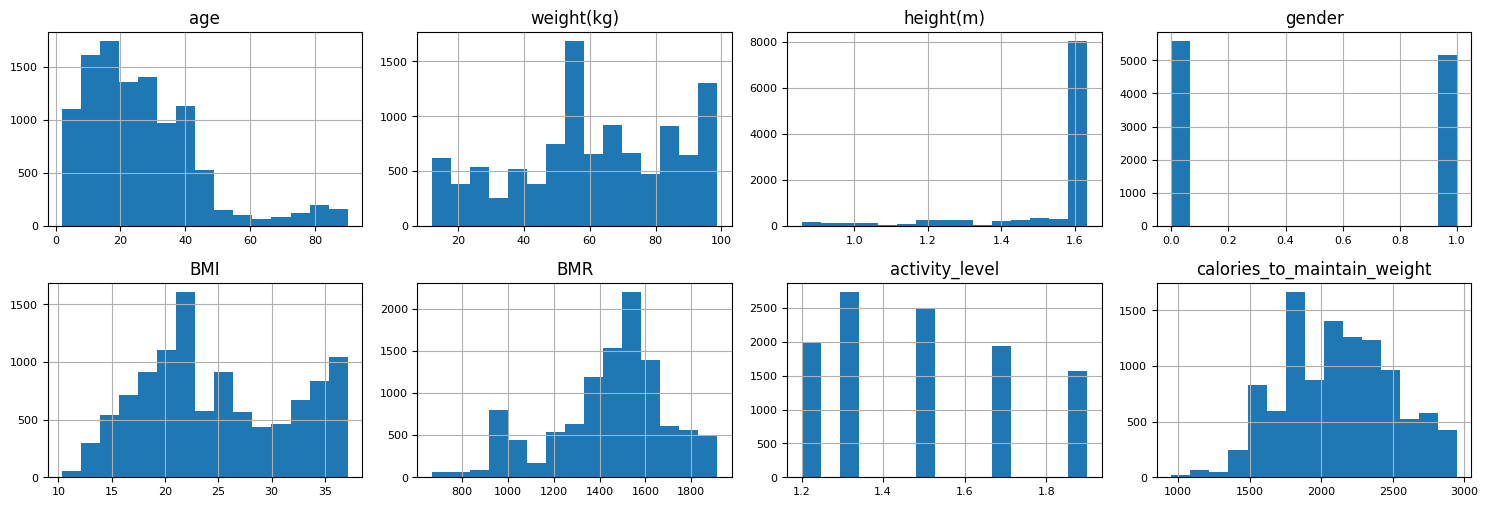

In [49]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10), layout=(4, 4), xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

# Bar charts for categorical data
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[column], order = df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()


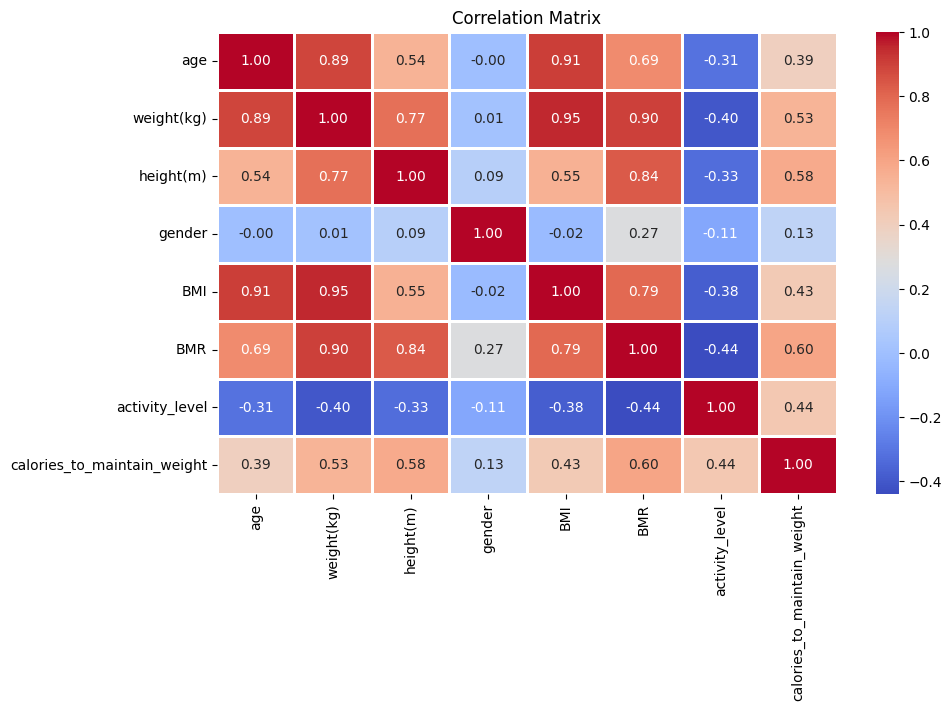

In [54]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Correlation Matrix')
plt.show()


In [52]:
# Check for missing values
print(df.isnull().sum())

age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
dtype: int64


**Split the Dataset**

In [35]:
# Separate features and target variable
X = df.drop(columns=['calories_to_maintain_weight'])
y = df['calories_to_maintain_weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest Regression**

In [36]:
# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse_rf = mse ** 0.5

# Output the RMSE for Random Forest Regression
print("RMSE for Random Forest Regression:", rmse_rf)


RMSE for Random Forest Regression: 3.541606061748423


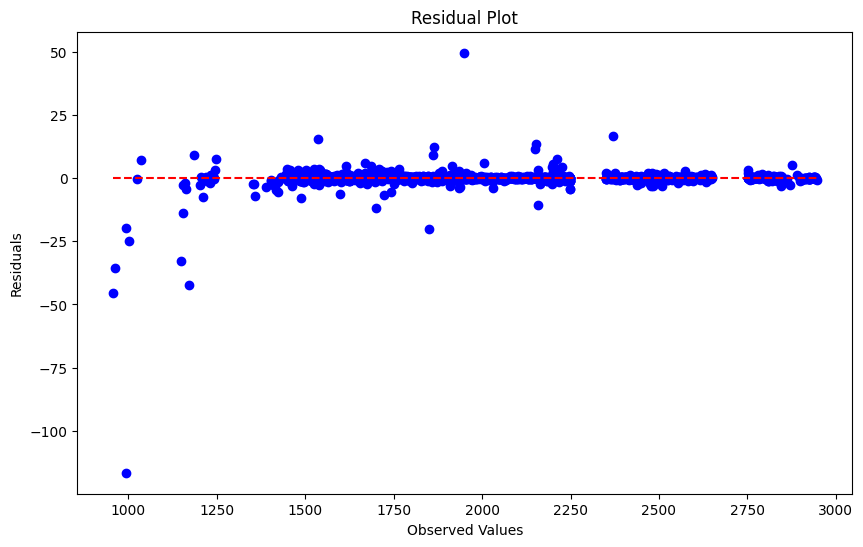

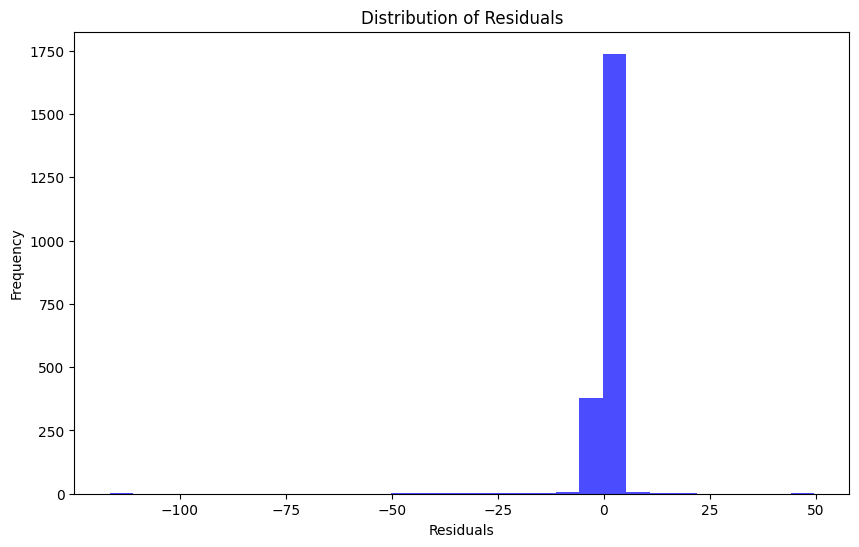

In [38]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, color='blue')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Additionally, you might want to look at the distribution of the residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


**Residual Analysis**

1. Residual Plot:

* The residuals are mostly centered around zero, which is good as it indicates no obvious bias in the predictions.
* The spread of residuals appears consistent across different observed values, suggesting good model performance across the range of calorie values.
* There are a few outliers, particularly large negative residuals, which could be specific cases where the model predictions deviate significantly from the actual values.

2. Distribution of Residuals:

* The residuals are predominantly clustered around zero, which indicates that the model's predictions are generally accurate.
* The distribution is very narrow, showing that most residuals are close to zero, reaffirming the model's accuracy.
* The presence of a few outliers in the negative range suggests some instances where the model underpredicts significantly.

**Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5

# Output the RMSE for Linear Regression
print("RMSE for Linear Regression:", rmse_lr)


RMSE for Linear Regression: 45.37859927936561


**Gradient Boosting Regression**

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = mse_gbr ** 0.5

# Output the RMSE for Gradient Boosting Regressor
print("RMSE for Gradient Boosting Regressor:", rmse_gbr)


RMSE for Gradient Boosting Regressor: 20.541713683100344
